<a href="https://colab.research.google.com/github/IbrahimTGhanem/Datathon2/blob/main/Datathon_2_Group_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 1: Exploring data**

In [15]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

# Specify the path to the file on your local machine
uploaded = files.upload()

Saving Mortality Dataset.csv to Mortality Dataset.csv


In [18]:
# We have already uploaded the dataset
data = pd.read_csv('Mortality Dataset.csv')

# View the first few rows of the dataset
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
description = data.describe()
description


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


There is no zeros in continous variables.

In [ ]:
# We have already uploaded the dataset
data = pd.read_csv('Mortality Dataset.csv')

# View the first few rows of the dataset
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Checking for missing values
print(data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**1.1 Visual Exploration of variables**

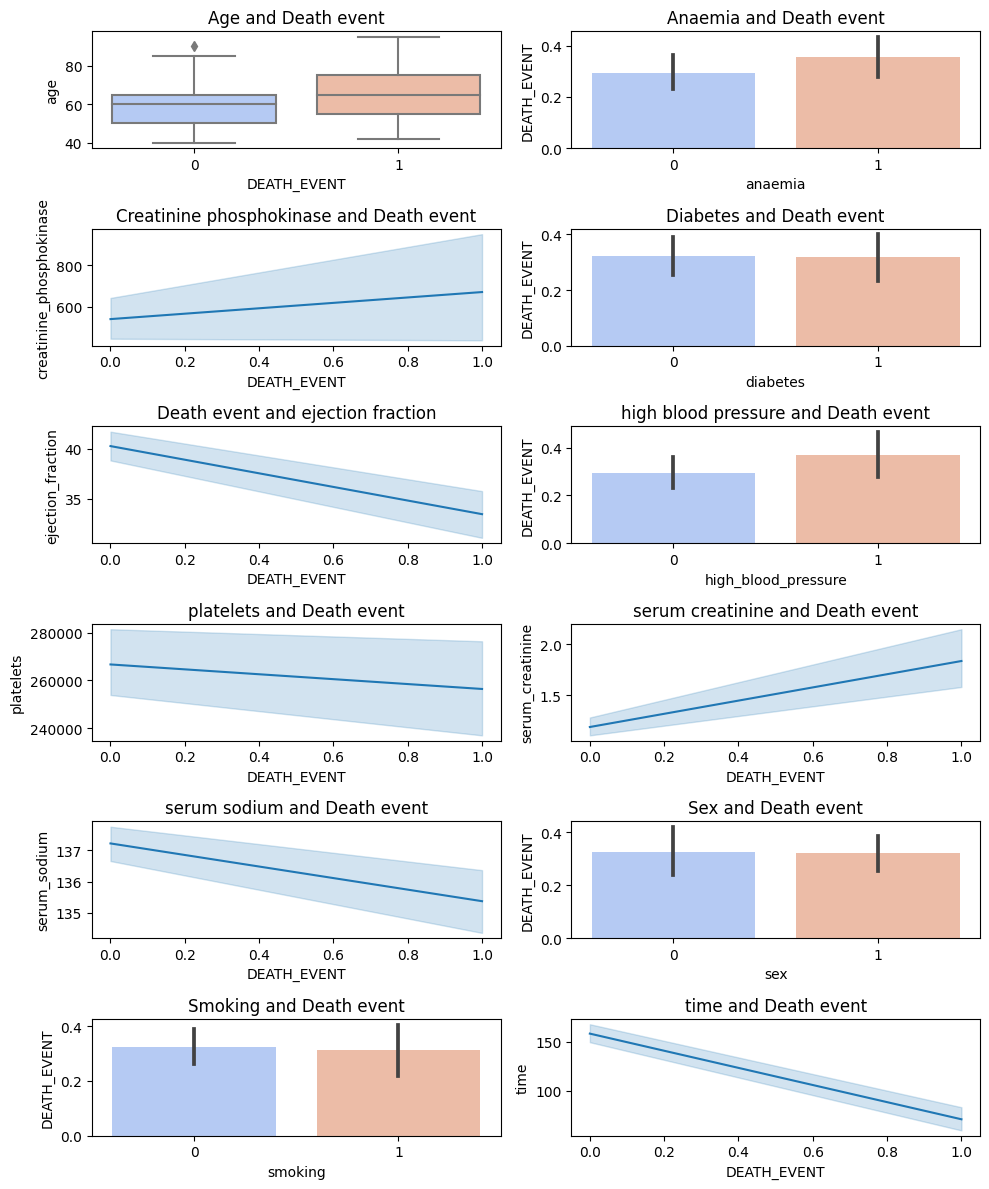

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(10, 12))

sns.boxplot(data=data, x="DEATH_EVENT", y="age", palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title("Age and Death event")

sns.barplot(data=data, x="anaemia", y="DEATH_EVENT", palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title("Anaemia and Death event")

sns.lineplot(data=data, x="DEATH_EVENT", y="creatinine_phosphokinase", palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title("Creatinine phosphokinase and Death event")

sns.barplot(data=data, x="diabetes", y="DEATH_EVENT", palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title("Diabetes and Death event")

sns.lineplot(data=data, x="DEATH_EVENT", y="ejection_fraction", palette='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title("Death event and ejection fraction")

sns.barplot(data=data, x="high_blood_pressure", y="DEATH_EVENT", palette='coolwarm', ax=axes[2, 1])
axes[2, 1].set_title("high blood pressure and Death event")

sns.lineplot(data=data, x="DEATH_EVENT", y="platelets", palette='coolwarm', ax=axes[3, 0])
axes[3, 0].set_title("platelets and Death event")

sns.lineplot(data=data, x="DEATH_EVENT", y="serum_creatinine", palette='coolwarm', ax=axes[3, 1])
axes[3, 1].set_title("serum creatinine and Death event")

sns.lineplot(data=data, x="DEATH_EVENT", y="serum_sodium", palette='coolwarm', ax=axes[4, 0])
axes[4, 0].set_title("serum sodium and Death event")

sns.barplot(data=data, x="sex", y="DEATH_EVENT", palette='coolwarm', ax=axes[4, 1])
axes[4, 1].set_title("Sex and Death event")

sns.barplot(data=data, x="smoking", y="DEATH_EVENT", palette='coolwarm', ax=axes[5, 0])
axes[5, 0].set_title("Smoking and Death event")

sns.lineplot(data=data, x="DEATH_EVENT", y="time", palette='coolwarm', ax=axes[5, 1])
axes[5, 1].set_title("time and Death event")

#plot layout
plt.tight_layout()

#visualize plots
plt.show()

based on the above plots, it appears that differences in smoking, diabetes and sex might not have different assocaitions with mortality

**1.2 Examining multicolinearity**

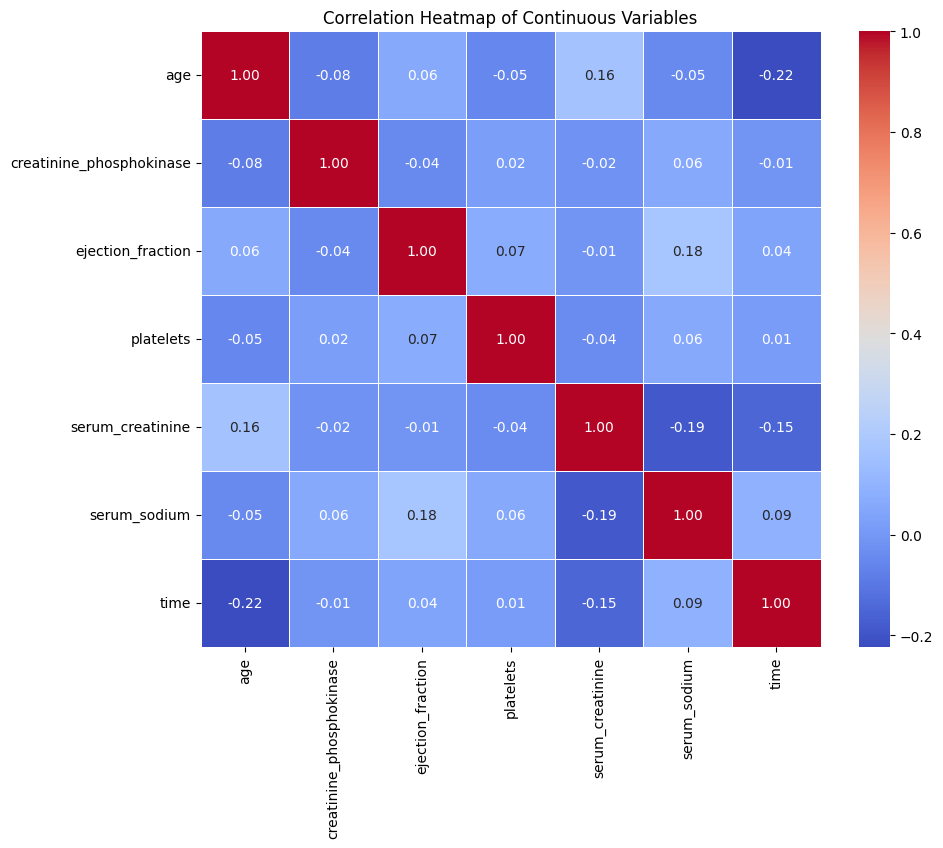

In [ ]:
#correlationMatrix
continuousVariables = data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

correlationMatrix = continuousVariables.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()


no significant colleration levels among the continuous variables

**1.3: exploring ddistribution of variables (non-scaled and scaled for the purpose of checking for ourliers)**

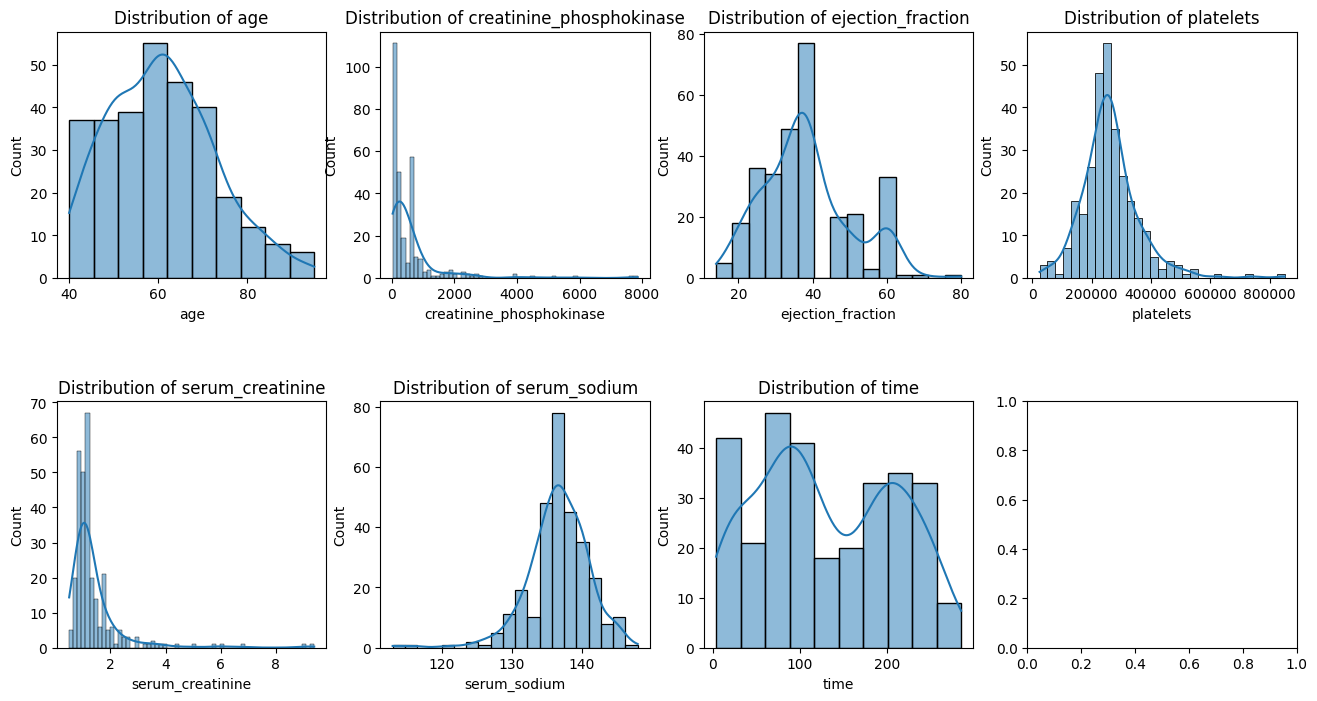

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(continuousVariables.columns):
    sns.histplot(data[continuousVariables.columns[i]], ax=axes[i//4, i%4], kde=True)
    axes[i//4, i%4].set_title(f'Distribution of {col}')

plt.show()

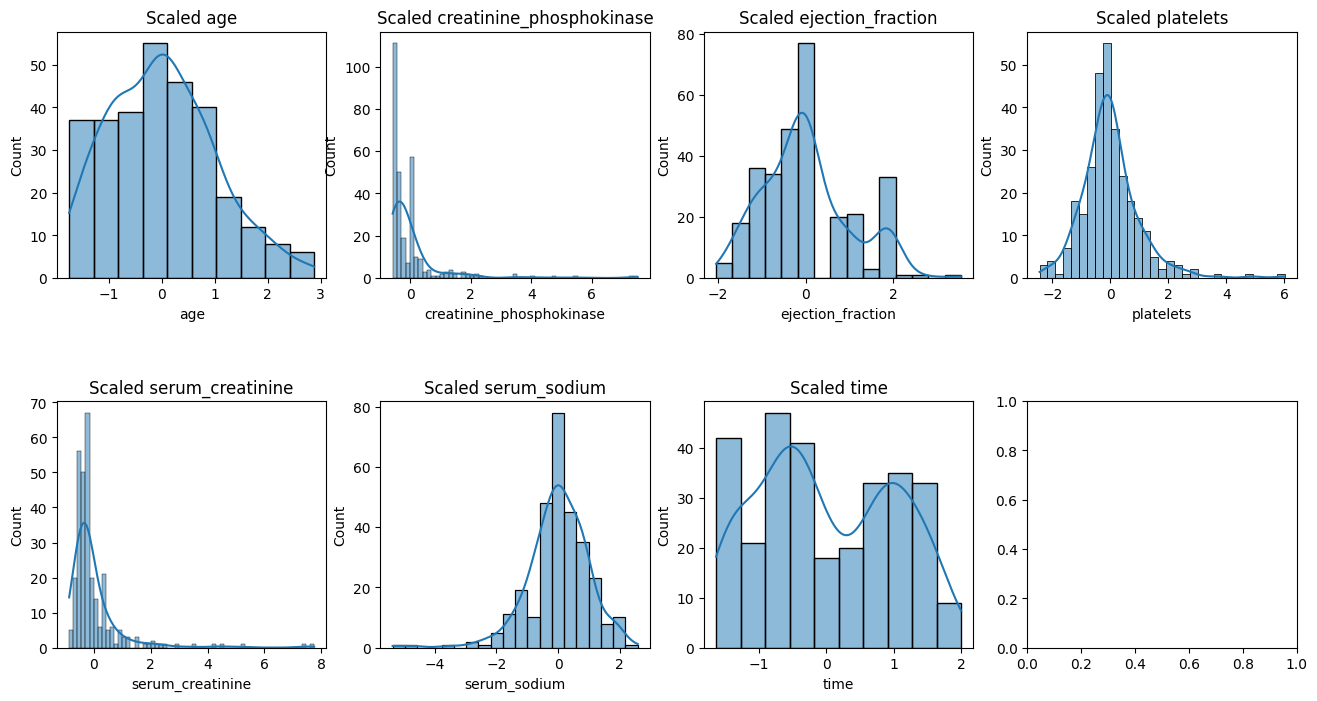

In [ ]:
scaler = StandardScaler()

# Scale the continuous variables
scaled_variables = scaler.fit_transform(continuousVariables)

# Create a DataFrame from the scaled variables
scaled_df = pd.DataFrame(scaled_variables, columns=continuousVariables.columns)

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Create histograms for scaled continuous variables
for i, col in enumerate(scaled_df.columns):
    sns.histplot(scaled_df[col], ax=axes[i//4, i%4], kde=True)
    axes[i//4, i%4].set_title(f'Scaled {col}')

plt.show()

In [ ]:
#Defining a Z-score threshold
zscore_threshold = 3

# Iterate through each continuous variable and print potential outliers
for variable_name in continuousVariables:
    data_column = data[variable_name]
    z_scores = (data_column - data_column.mean()) / data_column.std()
    outliers = data_column[abs(z_scores) > zscore_threshold]
    print(f"Outliers in '{variable_name}':")
    print(outliers)
    print("\n")

Outliers in 'age':
Series([], Name: age, dtype: float64)


Outliers in 'creatinine_phosphokinase':
1      7861
52     3964
60     7702
72     5882
103    5209
134    4540
171    3966
Name: creatinine_phosphokinase, dtype: int64


Outliers in 'ejection_fraction':
64    80
Name: ejection_fraction, dtype: int64


Outliers in 'platelets':
105    621000.0
109    850000.0
296    742000.0
Name: platelets, dtype: float64


Outliers in 'serum_creatinine':
9      9.4
28     5.8
52     6.8
131    6.1
217    9.0
228    5.0
Name: serum_creatinine, dtype: float64


Outliers in 'serum_sodium':
4      116
19     121
199    113
Name: serum_sodium, dtype: int64


Outliers in 'time':
Series([], Name: time, dtype: int64)




As we have 20 rows wih outliers, a sensitivity analysis will be conducted to examine the influence of these outliers on prediciting mortality

**Section 2: Running logistic regression for the whole dataset (model #1)**

In [ ]:
# Split the data into features and target variable
X1 = data.drop('DEATH_EVENT', axis=1)
y1 = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=101)

# Normalizing data
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [ ]:
# Training logistic regression model
log_reg1 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg1.fit(X_train1, y_train1)

LogisticRegression(solver='liblinear')

In [ ]:
# Use the model to make predictions on the testing data
y_pred1 = log_reg1.predict(X_test1)

# Evaluate the model
conf_matrix1 = confusion_matrix(y_test1, y_pred1)
class_report1 = classification_report(y_test1, y_pred1)

print("Confusion Matrix:")
print(conf_matrix1)
print("\nClassification Report:")
print(class_report1)

Confusion Matrix:
[[41  4]
 [ 2 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        45
           1       0.76      0.87      0.81        15

    accuracy                           0.90        60
   macro avg       0.86      0.89      0.87        60
weighted avg       0.91      0.90      0.90        60



Accuracy of 90%

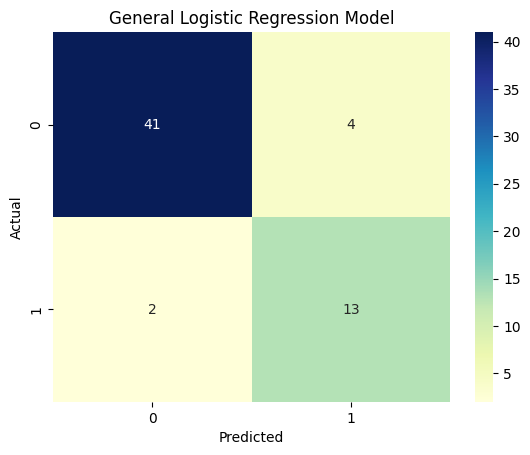

In [ ]:
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='YlGnBu')
plt.title('General Logistic Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

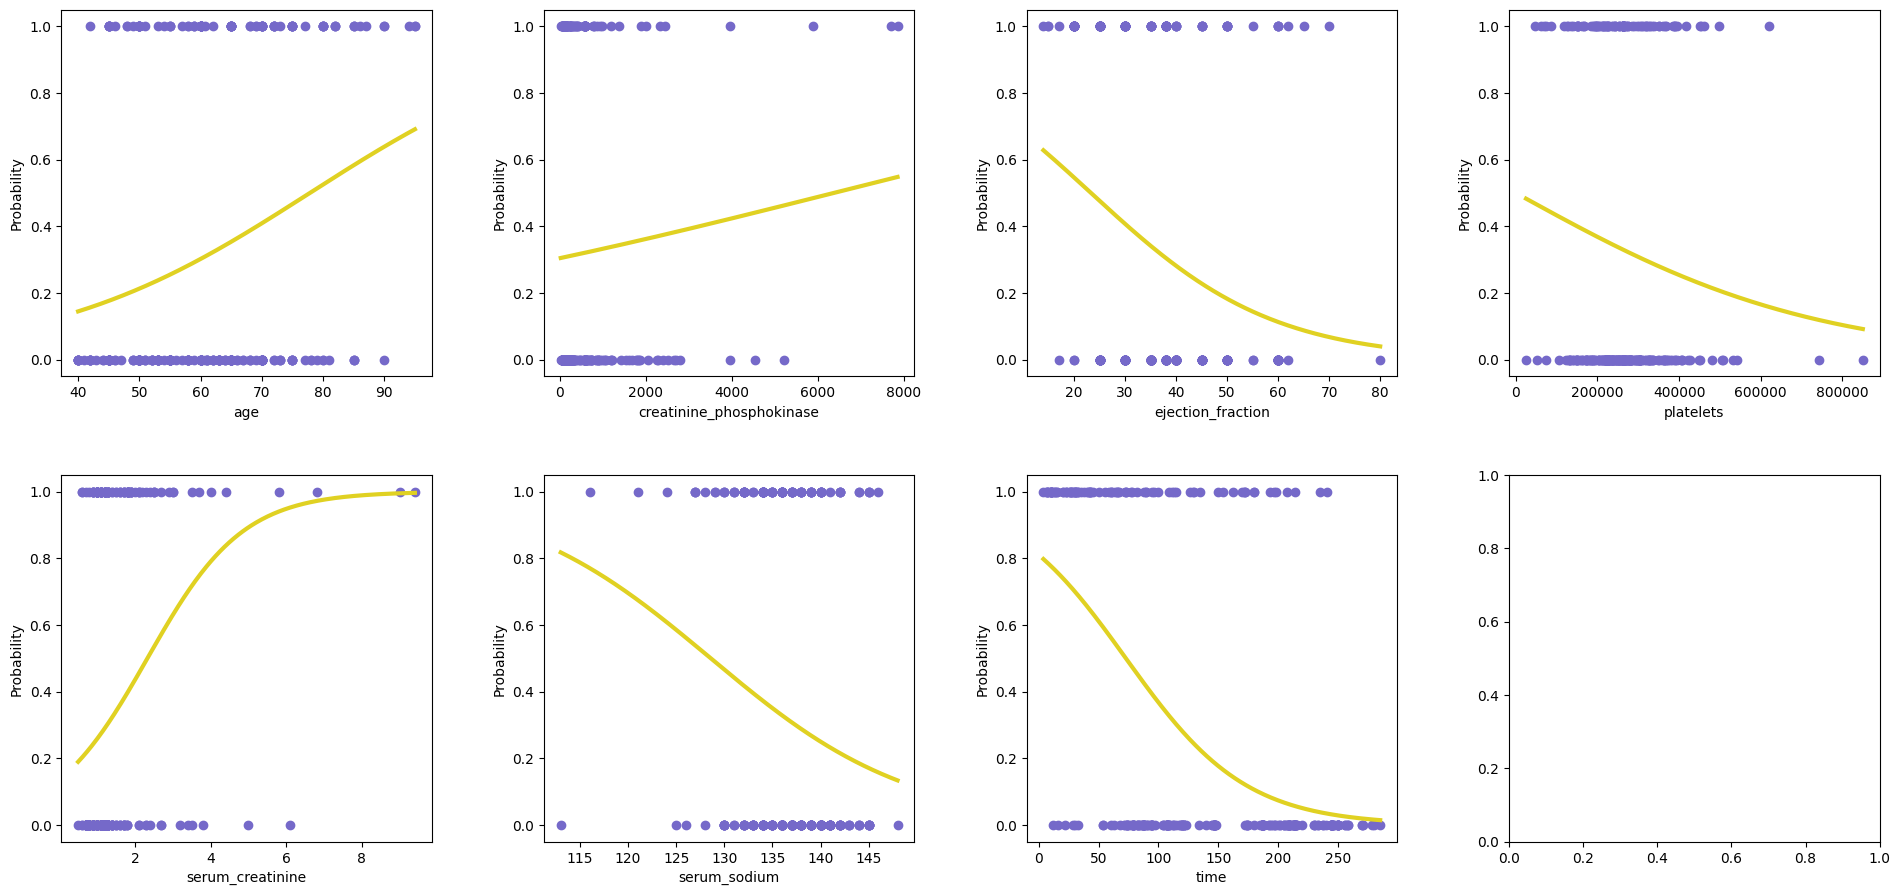

In [ ]:
#visualzing segmoid curve for the continous variables
warnings.filterwarnings("ignore")

log_reg1 = LogisticRegression()

# List of continuous variables
continuous_variables = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Calculate the number of rows and columns for subplots
num_features = len(continuous_variables)
num_rows = 2
num_cols = (num_features + num_rows - 1) // num_rows

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

for i, feature in enumerate(continuous_variables):
    row = i // num_cols
    col = i % num_cols

    # Reshape the feature and outcome arrays to fit the model
    X1 = data[[feature]]
    y1 = data['DEATH_EVENT']

    # Fit logistic regression model
    log_reg1.fit(X1, y1)

    # Get min and max values of the feature for plotting
    x_test1 = np.linspace(X1.min(), X1.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg1.predict_proba(x_test1)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X1, y1, color='#7569c9')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test1, prob, color='#e0d122', lw=3)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')

plt.show()

# Restore warnings (optional)
warnings.filterwarnings("default")


it appears that CPK and platelets might require transformations that will be based on ladder of treansformations

**2.1 Model 1 summary**

In [ ]:
# Separate features and target variable
X1 = data.drop('DEATH_EVENT', axis=1)
y1 = data['DEATH_EVENT']

# Create and fit logistic regression model
log_reg1 = sm.Logit(y1, X1).fit()

# Get summary report
summary1 = log_reg1.summary()
print(summary1)

Optimization terminated successfully.
         Current function value: 0.372660
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.4063
Time:                        02:00:53   Log-Likelihood:                -111.43
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 4.599e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                          0.0523      0.015      3.387      0.001       0.022

**only age, ejection_fraction, serum_creatinine, and time appear to be significant**

**Section 3: Sensitivity analysis**

In [ ]:
Data2 = pd.read_csv('Mortality Dataset.csv')

In [ ]:
# Define a Z-score threshold
zscore_threshold = 3

# Iterate through each continuous variable and filter out rows with outliers
for variable_name in continuousVariables:
    data_column = Data2[variable_name]
    z_scores = (data_column - data_column.mean()) / data_column.std()
    outliers = data_column[abs(z_scores) > zscore_threshold]
    Data2 = Data2[~Data2.index.isin(outliers.index)]

# Check the shape of the cleaned dataset
print("data length:", Data2.shape)

In [ ]:
# Split the data into features and target variable
X2 = Data2.drop('DEATH_EVENT', axis=1)
y2 = Data2['DEATH_EVENT']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=101)

# Normalizing data
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [ ]:
log_reg2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg2.fit(X_train2, y_train2)

LogisticRegression(solver='liblinear')

In [ ]:
# Use the model to make predictions on the testing data
y_pred2 = log_reg2.predict(X_test2)

# Evaluate the model
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
class_report2 = classification_report(y_test2, y_pred2)

print("Confusion Matrix:")
print(conf_matrix2)
print("\nClassification Report:")
print(class_report2)

Confusion Matrix:
[[37  1]
 [10  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        38
           1       0.89      0.44      0.59        18

    accuracy                           0.80        56
   macro avg       0.84      0.71      0.73        56
weighted avg       0.82      0.80      0.78        56



In [ ]:
# Separate features and target variable
X = Data2.drop('DEATH_EVENT', axis=1)
y = Data2['DEATH_EVENT']

# Add a constant term for the intercept
X1 = sm.add_constant(X2)

# Create and fit logistic regression model
log_reg2 = sm.Logit(y2, X2).fit()

# Get summary report
summary2 = log_reg2.summary()
print(summary2)

Optimization terminated successfully.
         Current function value: 0.366626
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  279
Model:                          Logit   Df Residuals:                      267
Method:                           MLE   Df Model:                           11
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.4036
Time:                        02:22:23   Log-Likelihood:                -102.29
converged:                       True   LL-Null:                       -171.52
Covariance Type:            nonrobust   LLR p-value:                 3.351e-24
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                          0.0565      0.017      3.293      0.001       0.023

While accuracy dropped by 10 points from the original model, The pesudo R-squ and the siginficant variables did not differ from the orignal. This would indicate that outliers are not influencing the model outcomes

**Section 4: adding transformations and interactions**

In [ ]:
# interaction term for 'smoking' and 'diabetes'
data['smoking_diabetes'] = data['smoking'] * data['diabetes']

# interaction term for 'anaemia' and 'smoking'
data['anaemia_smoking'] = data['anaemia'] * data['smoking']

# interaction term for 'anaemia' and 'diabetes'
data['diabetes_anaemia'] = data['anaemia'] * data['diabetes']

# interaction term for 'anaemia' and 'high bloood pressure'
data['high_blood_anaemia'] = data['anaemia'] * data['high_blood_pressure']

data['log_creatinine_phosphokinase'] = np.log(data['creatinine_phosphokinase'])

data['log_platelets'] = np.log(data['platelets'])

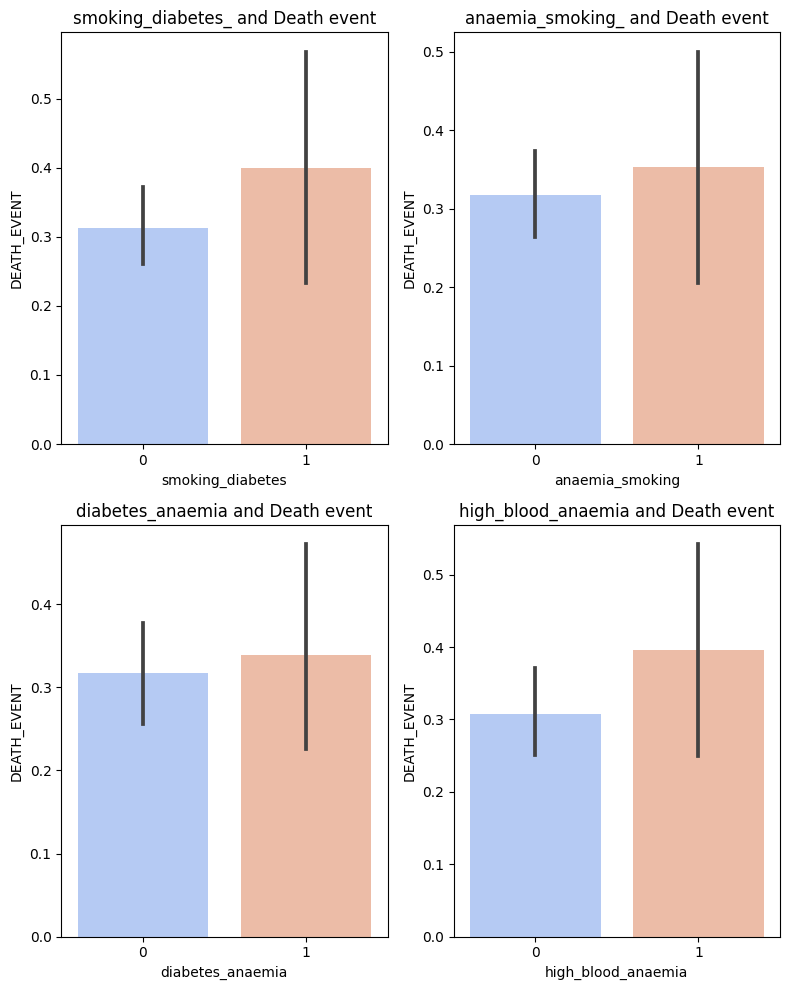

In [ ]:
#visualzing new variables (part 1)
fig, axes = plt.subplots(2, 2, figsize=(8, 10))

sns.barplot(data=data, x="smoking_diabetes", y="DEATH_EVENT", palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title("smoking_diabetes_ and Death event")

sns.barplot(data=data, x="anaemia_smoking", y="DEATH_EVENT", palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title("anaemia_smoking_ and Death event")

sns.barplot(data=data, x="diabetes_anaemia", y="DEATH_EVENT", palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title("diabetes_anaemia and Death event")

sns.barplot(data=data, x="high_blood_anaemia", y="DEATH_EVENT", palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title("high_blood_anaemia and Death event")

#plot layout
plt.tight_layout()

#visualize plots
plt.show()

interactions of smoking and diabetes as well as the interaction of high blood pressure and anaemia appear to associated with mortality

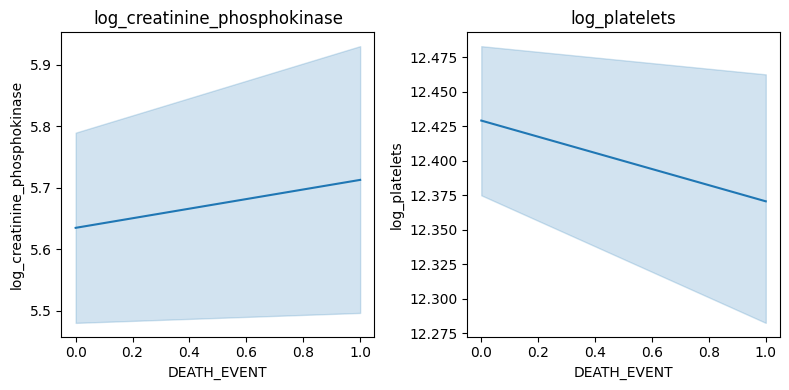

In [ ]:
#visualzing new variables (part 2)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.lineplot(data=data, x="DEATH_EVENT", y="log_creatinine_phosphokinase", ax=axes[0])
axes[0].set_title("log_creatinine_phosphokinase")

sns.lineplot(data=data, x="DEATH_EVENT", y="log_platelets", ax=axes[1])
axes[1].set_title("log_platelets")

# plot layout
plt.tight_layout()

# visualize plots
plt.show()

**4.1 Running a new model where new variables are added**

In [ ]:
# Split the data into features and target variable
X3 = data.drop(['DEATH_EVENT', 'creatinine_phosphokinase', 'platelets'], axis=1)
y3 = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=101)

# Normalizing data
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [ ]:
log_reg3 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg3.fit(X_train3, y_train3)

LogisticRegression(solver='liblinear')

In [ ]:
# Use the model to make predictions on the testing data
y_pred3 = log_reg3.predict(X_test3)

# Evaluate the model
conf_matrix3 = confusion_matrix(y_test3, y_pred3)
class_report3 = classification_report(y_test3, y_pred3)

print("Confusion Matrix:")
print(conf_matrix3)
print("\nClassification Report:")
print(class_report3)

Confusion Matrix:
[[39  6]
 [ 3 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        45
           1       0.67      0.80      0.73        15

    accuracy                           0.85        60
   macro avg       0.80      0.83      0.81        60
weighted avg       0.86      0.85      0.85        60



In [ ]:
# Separate features and target variable
X3 = data.drop(['DEATH_EVENT', 'creatinine_phosphokinase', 'platelets'], axis=1)
y3 = data['DEATH_EVENT']

# Add a constant term for the intercept
X3 = sm.add_constant(X3)

# Create and fit logistic regression model
log_reg3 = sm.Logit(y3, X3).fit()

# Get summary report
summary3 = log_reg3.summary()
print(summary3)

Optimization terminated successfully.
         Current function value: 0.352160
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                           16
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.4389
Time:                        02:45:45   Log-Likelihood:                -105.30
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.327e-27
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           15.6180      8.227      1.898      0.058

It appears that all of the new variables are insignifcant, except with log of CPK. Thus, additional indivdual variables will be examined.

**Section 5: Running logistic regression for each variable indivdually**


In [ ]:
#show regression report for each metric

for i, feature in enumerate(data.columns[:-1]):  # Exclude 'Outcome' column
    # Reshape the feature and outcome arrays to fit the model
    X4 = data[[feature]]
    y4 = data['DEATH_EVENT']

    # Add a constant term for the intercept
    X4 = sm.add_constant(X4)

    # Create and fit logistic regression model
    log_reg4 = sm.Logit(y4, X4).fit()

    # Get summary report
    summary4 = log_reg4.summary()
    print(summary4)
    warnings.filterwarnings("default")


Optimization terminated successfully.
         Current function value: 0.595306
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                 0.05157
Time:                        03:07:54   Log-Likelihood:                -178.00
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.085e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6543      0.707     -5.172      0.000      -5.039      -2.269
age            0.0469      0.

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.626131
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                0.002457
Time:                        03:07:56   Log-Likelihood:                -187.21
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                    0.3369
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7895      0.132     -6.001      0.000      -1.047      -0.532
smoking_dia

 Upon examining all variables individually (including interaction terms and transofmred variables), the sign five variables (based on P-value) appears to be: 'age', 'ejection_fraction', 'serum_sodium', 'serum_creatinine', 'time' ).

**5.1: Runing final logistic regression with shortlisted features**

In [5]:
# Split the data into features and target variable
X5 = data[['age', 'ejection_fraction', 'serum_sodium', 'serum_creatinine', 'time' ]]
Y5 = data['DEATH_EVENT']


# Split the data into training and testing sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, Y5, test_size=0.2, random_state=101)

# Normalizing data
scaler = StandardScaler()
X_train5 = scaler.fit_transform(X_train5)
X_test5 = scaler.transform(X_test5)

In [6]:
# Training logistic regression model
log_reg5 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg5.fit(X_train5, y_train5)

LogisticRegression(solver='liblinear')

In [7]:
# Use the model to make predictions on the testing data
y_pred5 = log_reg5.predict(X_test5)

# Evaluate the model
conf_matrix5 = confusion_matrix(y_test5, y_pred5)
class_report5 = classification_report(y_test5, y_pred5)

print("Confusion Matrix:")
print(conf_matrix5)
print("\nClassification Report:")
print(class_report5)

Confusion Matrix:
[[40  5]
 [ 4 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        45
           1       0.69      0.73      0.71        15

    accuracy                           0.85        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.85      0.85      0.85        60



Accuracy of 85%

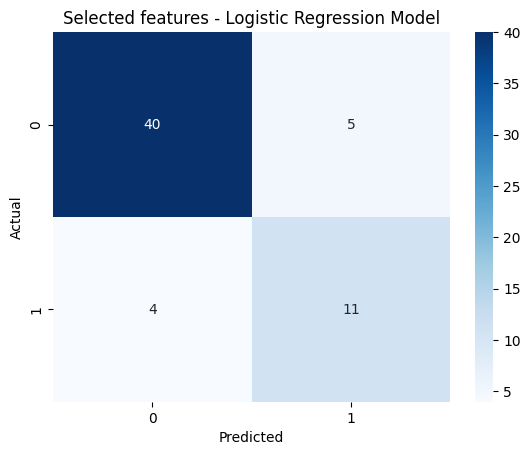

In [8]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues')
plt.title('Selected features - Logistic Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
X5 = data[['age', 'ejection_fraction', 'serum_sodium', 'serum_creatinine', 'time' ]]
Y5 = data['DEATH_EVENT']

# Add a constant term for the intercept
X5 = sm.add_constant(X5)

# Create and fit logistic regression model
log_reg5 = sm.Logit(Y5, X5).fit()

# Get summary report
summary5 = log_reg5.summary()
print(summary5)

Optimization terminated successfully.
         Current function value: 0.373723
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            5
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                  0.4046
Time:                        02:21:33   Log-Likelihood:                -111.74
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 5.358e-31
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.4930      5.406      1.756      0.079      -1.102      20.088
age     

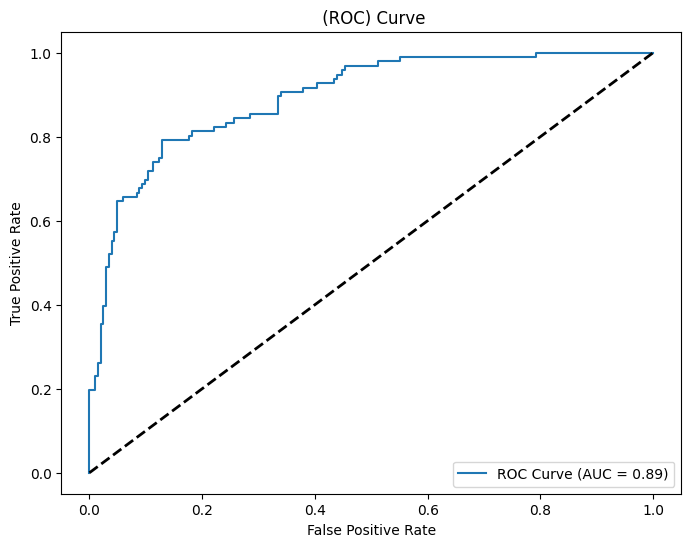

In [10]:
predicted_probs = log_reg5.predict(X5)

# Calculate ROC-AUC
roc_auc = roc_auc_score(Y5, predicted_probs)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(Y5, predicted_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
#fitting KNN:
X6 = data[['age', 'ejection_fraction', 'serum_sodium', 'serum_creatinine', 'time' ]]
Y6 = data['DEATH_EVENT']

# Normalizing data
scaler = StandardScaler()
X6_scaled = scaler.fit_transform(X6)

# Split the data into training and testing sets
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6_scaled, Y6, test_size=0.2, random_state=101)

Max f1 score = 0.82; k = 9
Max precision = 0.84; k = 12
Max recall = 0.83; k = 6


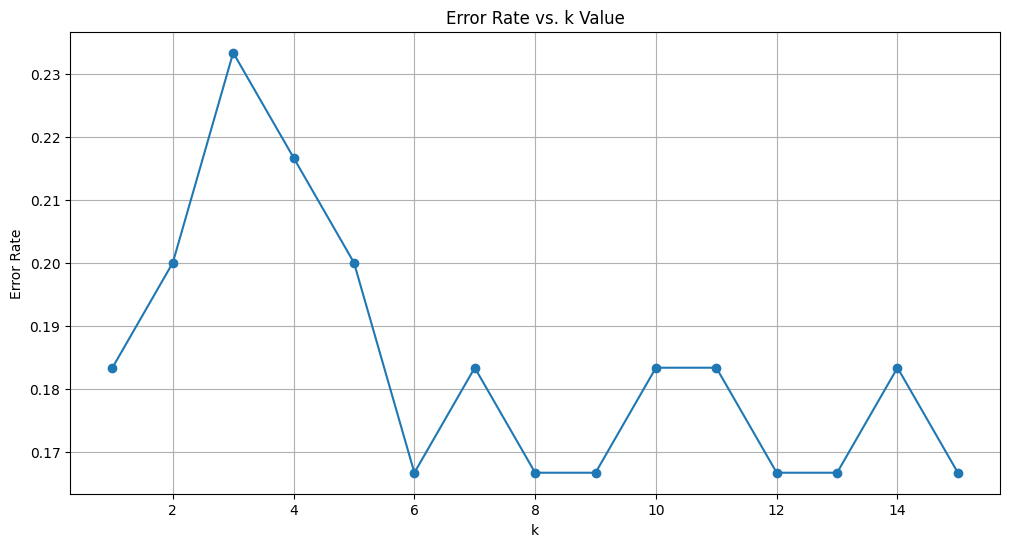

In [40]:
#Elbow method for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Choose a range of k values to test. In this case, we'll test values from 1 to
k_values = range(1, 16)

# A list to keep track of the error rates, f1-score, precision, recall for each k value.
errors = []
f1_score = []
precision = []
recall = []
accuracy = []

# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

    # Train the classifier on the training data.
    knn.fit(X_train6, y_train6.values.ravel()) # .ravel() to flatten array to proper shape

    # Predict the labels for the test set.
    y_pred6 = knn.predict(X_test6)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test6, y_pred6)
    errors.append(error)

    # classification report to calculate f1 score at each k
    report = classification_report(y_test6, y_pred6, output_dict=True)
    f1_score.append(report['weighted avg']['f1-score'])
    precision.append(report['weighted avg']['precision'])
    recall.append(report['weighted avg']['recall'])

print("Max f1 score = {}; k = {}".format(np.max(f1_score).round(2), f1_score.index(np.max(f1_score))+1 ))
print("Max precision = {}; k = {}".format(np.max(precision).round(2), precision.index(np.max(precision))+1 ))
print("Max recall = {}; k = {}".format(np.max(recall).round(2), recall.index(np.max(recall))+1 ))

# Plotting Errors
# This visualization helps in understanding the relationship between k value and the error rate.
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

Six neighbours appears to be the one with the least errors

In [41]:
# Evaluate the model
y_pred6 = knn.predict(X_test6)
conf_matrix6 = confusion_matrix(Y_test6, y_pred6)
class_report6 = classification_report(Y_test6, y_pred6)

print("Confusion Matrix:")
print(conf_matrix6)
print("\nClassification Report:")
print(class_report6)

Confusion Matrix:
[[30  5]
 [19  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.86      0.71        35
           1       0.55      0.24      0.33        25

    accuracy                           0.60        60
   macro avg       0.58      0.55      0.52        60
weighted avg       0.58      0.60      0.56        60



**accuracy of 60%**

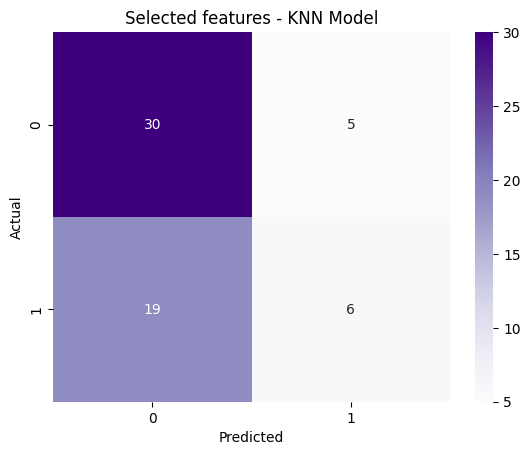

In [42]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix6, annot=True, fmt='d', cmap='Purples')
plt.title('Selected features - KNN Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [20]:
print(X5)

     const   age  ejection_fraction  serum_sodium  serum_creatinine  time
0      1.0  75.0                 20           130               1.9     4
1      1.0  55.0                 38           136               1.1     6
2      1.0  65.0                 20           129               1.3     7
3      1.0  50.0                 20           137               1.9     7
4      1.0  65.0                 20           116               2.7     8
..     ...   ...                ...           ...               ...   ...
294    1.0  62.0                 38           143               1.1   270
295    1.0  55.0                 38           139               1.2   271
296    1.0  45.0                 60           138               0.8   278
297    1.0  45.0                 38           140               1.4   280
298    1.0  50.0                 45           136               1.6   285

[299 rows x 6 columns]
